In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
file_path = "processing_data_1.xlsx"
df = pd.read_excel(file_path)

In [24]:
features = ["price_log1p", "rating_average", "quantity_sold_value", "discount_percent_clean"]
X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster_id"] = kmeans.fit_predict(X_scaled)

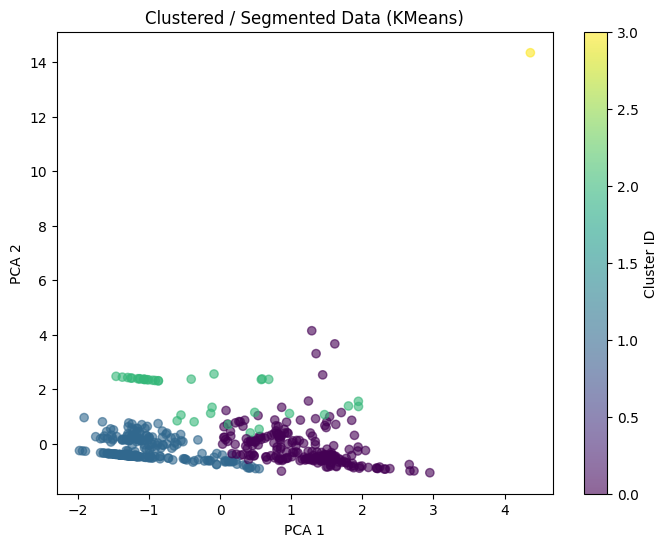

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["cluster_id"], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustered / Segmented Data (KMeans)")
plt.colorbar(label="Cluster ID")
plt.show()

In [26]:
cluster_summary = df.groupby("cluster_id")[features].mean()
print(cluster_summary)

            price_log1p  rating_average  quantity_sold_value  \
cluster_id                                                     
0             13.777858        4.668349           222.784404   
1             15.863914        0.004115             5.148148   
2             14.508013        1.244444            24.555556   
3             15.173920        5.000000         25120.000000   

            discount_percent_clean  
cluster_id                          
0                        13.467890  
1                         9.773663  
2                        85.277778  
3                        22.000000  


In [27]:
df.to_excel("processing_data_2.xlsx", index=False)
print("[INFO] Đã lưu processing_data_2.xlsx với cột cluster_id")

[INFO] Đã lưu processing_data_2.xlsx với cột cluster_id
